In [1]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np
from pathlib import Path

from skimage.exposure import histogram
from matplotlib.pyplot import bar

In [2]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

C:\Users\cccxx\AppData\Local\Temp\ipykernel_7012\661714390.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(pyramids)
C:\Users\cccxx\AppData\Local\Temp\ipykernel_7012\661714390.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


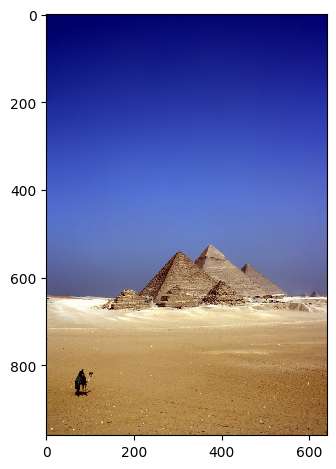

In [3]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()


In [4]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

C:\Users\cccxx\AppData\Local\Temp\ipykernel_7012\1666701399.py:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(coffee)
C:\Users\cccxx\AppData\Local\Temp\ipykernel_7012\1666701399.py:11: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


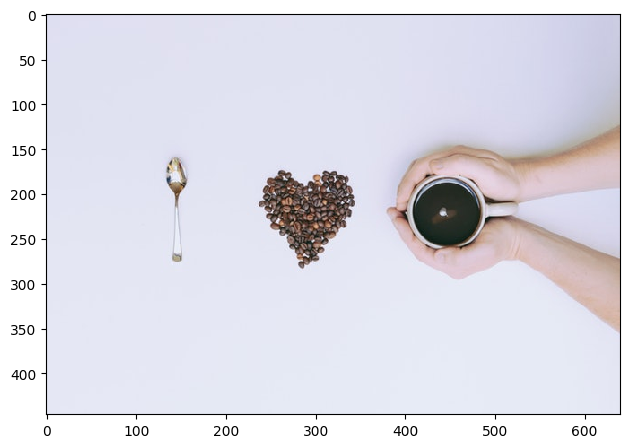

C:\Users\cccxx\AppData\Local\Temp\ipykernel_7012\1666701399.py:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(half_coffee)
C:\Users\cccxx\AppData\Local\Temp\ipykernel_7012\1666701399.py:15: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


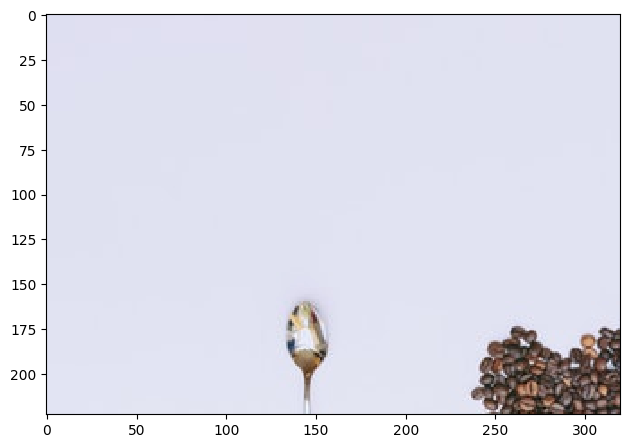

In [5]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions 
'''

coffee = io.imread("coffee.jpeg")
io.imshow(coffee)
io.show()

half_coffee = coffee[0:int(coffee.shape[0]/2), 0:int(coffee.shape[1]/2)]
io.imshow(half_coffee)
io.show()

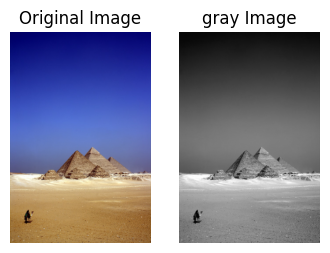

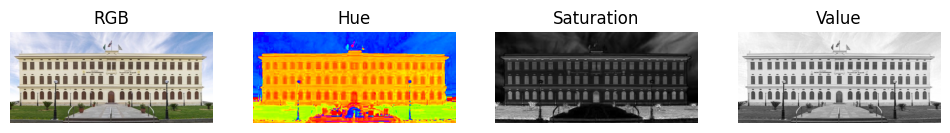

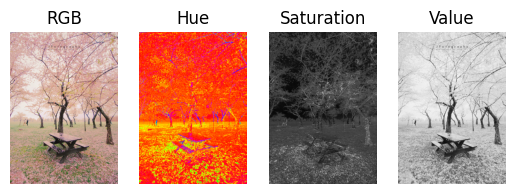

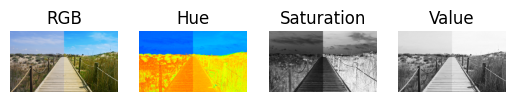

In [14]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
    
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''


def gray_image(image):
    gray_image = rgb2gray(image)

    plt.figure(figsize=(4, 8))
    
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title("gray Image")
    plt.axis("off")

    plt.show()

    

gray_image(io.imread('pyramids.jpeg'))



def HSV_image(hsv_folder_name):
    plt.figure(figsize=(12, 4))

    hsv_folder = Path(hsv_folder_name)
    for imgPath in hsv_folder.iterdir():
        img_uri = imgPath.resolve().as_uri()
        img = io.imread(img_uri)
        
        
        rgb_img = img
        img = rgb2hsv(img)
        hue_channel = img[:,:,0]
        saturation_channel = img[:,:,1]
        value_channel = img[:,:,2]

        plt.subplot(1, 4, 1)
        plt.imshow(rgb_img)
        plt.title("RGB")
        plt.axis('off')

        plt.subplot(1, 4, 2)
        plt.imshow(hue_channel, cmap='hsv')
        plt.title("Hue")
        plt.axis('off')


        plt.subplot(1, 4, 3)
        plt.imshow(saturation_channel, cmap='gray')
        plt.title("Saturation")
        plt.axis('off')


        plt.subplot(1, 4, 4)
        plt.imshow(value_channel, cmap='gray')
        plt.title("Value")
        plt.axis('off')


        plt.show()
    
HSV_image('hsv')



Text(0.5, 1.0, 'Salt & Pepper Noise (0.9)')

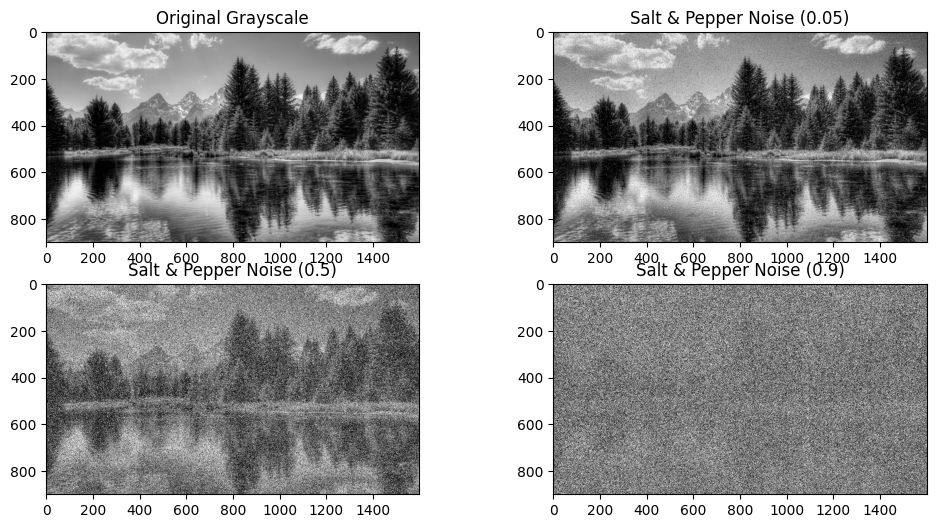

In [7]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.   
    * assumed other images means images in the lab folder
    Answer:
    histogram/ex1.jpg is less affected by noise because it is a grayscale image with most pixel values close to white,
    making the added noise less visually noticeable.
    Similarly, histogram/ex3.png is also resilient since it’s a grayscale image composed of distinct regions with uniform intensity.

    Conclusion:
    Images with simple shapes and large uniform regions of color or intensity are less affected by salt & pepper noise,
    as random pixel changes do not significantly alter the overall visual structure.
    '''

img = io.imread('peaceful.jpg')
gray_img = rgb2gray(img)

noisy_005 = random_noise(gray_img, mode='s&p', amount=0.05)
noisy_05  = random_noise(gray_img, mode='s&p', amount=0.5)
noisy_09  = random_noise(gray_img, mode='s&p', amount=0.9)


plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale")

plt.subplot(2,2,2)
plt.imshow(noisy_005, cmap='gray')
plt.title("Salt & Pepper Noise (0.05)")

plt.subplot(2,2,3)
plt.imshow(noisy_05, cmap='gray')
plt.title("Salt & Pepper Noise (0.5)")

plt.subplot(2,2,4)
plt.imshow(noisy_09, cmap='gray')
plt.title("Salt & Pepper Noise (0.9)")



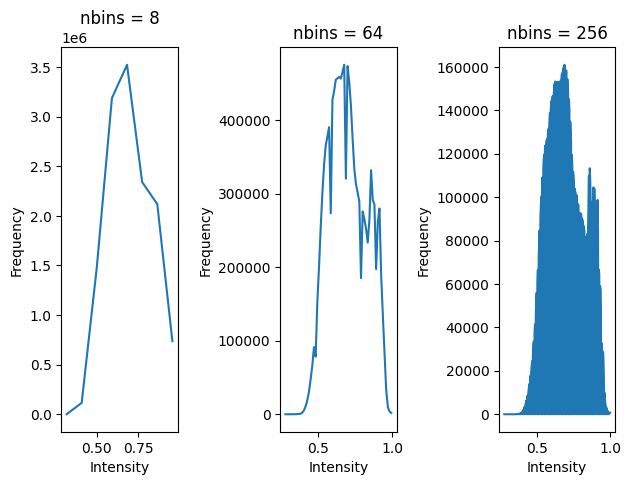

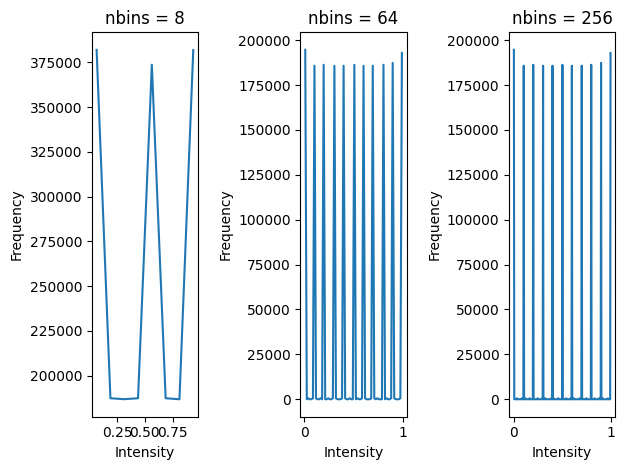

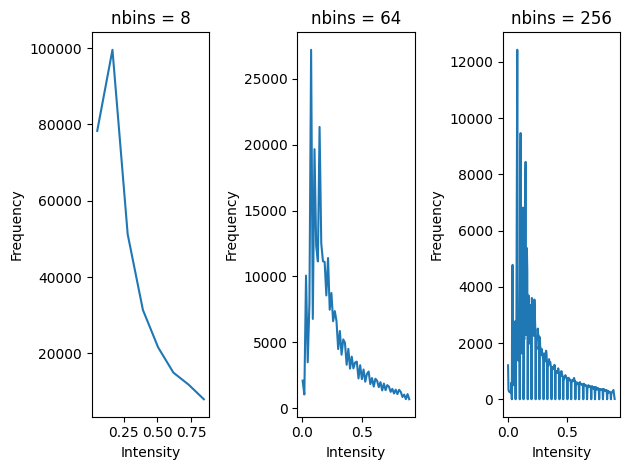

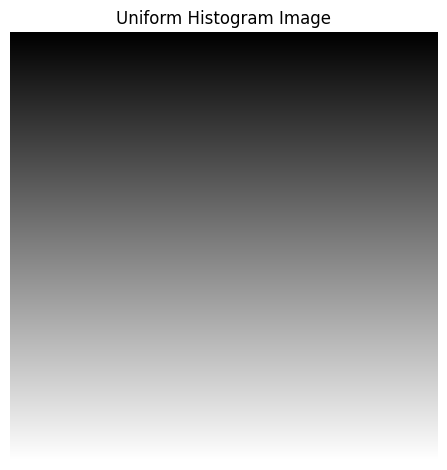

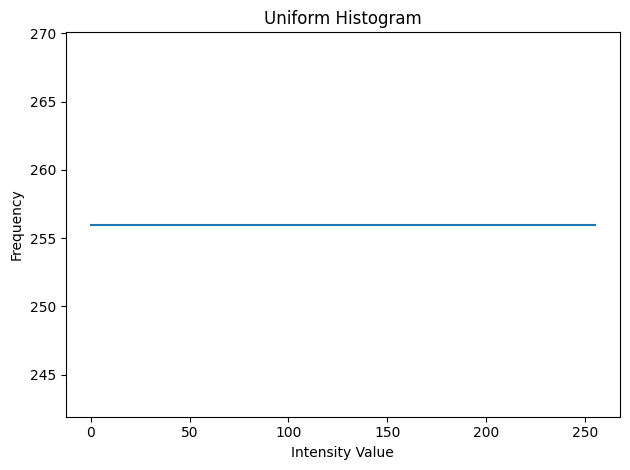

In [16]:
'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
        Answer: A histogram represents the frequency of each intensity level in an image.
        When using nbins=256, each of the 256 possible intensity levels is mapped to its own bin.
        Using a smaller number of bins (e.g., nbins=8) groups the intensity levels together,
        with each bin covering a range of 256 / 8 = 32 intensity values.


    B) and function(showHist) to draw it.
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''

# part1 

def showHist(hist, bin_centers, place):
    plt.subplot(1, 3, place)
    plt.plot(bin_centers, hist)
    plt.title(f'nbins = {bins}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
 
histogram_folder = Path('histogram')
for imgPath in histogram_folder.iterdir():
    img_uri = imgPath.resolve().as_uri()
    img = io.imread(img_uri, as_gray=True)
    
    for i, bins in enumerate([8, 64, 256], start=1):
        hist, bin_centers = histogram(img, nbins= bins)
        showHist(hist, bin_centers, i)
        
    plt.tight_layout()
    plt.show()


# part 2
values = np.arange(256)  
img = np.repeat(values, 256)
uniform_img = img.reshape((256, 256))

plt.imshow(uniform_img, cmap='gray', vmin=0, vmax=255)
plt.title("Uniform Histogram Image")
plt.axis('off')
plt.tight_layout()
plt.show()

hist, bin_centers = histogram(uniform_img, nbins=256)
plt.plot(bin_centers, hist)
plt.title("Uniform Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
